In [5]:
import json
import os
from collections import defaultdict

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
import json

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "cm"

matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42

In [6]:
MODEL_NAMES = {1: "$M_{0;1}$", 2: "$M_{0;2}$", 3: "$M_{0;3}$", 4: "$M_{0;123}$"}
output_dir = "/workspace/svd_subspace/outputs/llama"
results = defaultdict(list)
for gate_k in [8]:
    for k in [8, 16, 32, 64, 128, 256, 384, 512]:
        for version in [1, 2, 3, 4]:
            for task in ["gsm8k"]:
                result_dir = os.path.join(
                    output_dir,
                    f"gate_k-{gate_k}_k-{k}",
                    f"version_{version}",
                    f"{task}.json",
                )
                # get the first file in the file subdir of result_dir
                if not os.path.isdir(result_dir):
                    print(f"missing {result_dir}")
                    continue
                result_dir = os.path.join(result_dir, os.listdir(result_dir)[0])
                result_file = os.path.join(result_dir, os.listdir(result_dir)[0])

                results["gate_k"].append(gate_k)
                results["k"].append(k)
                results["version"].append(version)
                results["task"].append(task)
                results["model"].append(MODEL_NAMES[version])

                if task == "gsm8k":
                    with open(result_file, "r") as f:
                        data = json.load(f)
                    results["score"].append(
                        data["results"]["gsm8k"]["exact_match,flexible-extract"]
                    )

                with open(
                    os.path.join(
                        output_dir,
                        f"gate_k-{gate_k}_k-{k}",
                        f"version_{version}",
                        "model_info.json",
                    ),
                    "r",
                ) as f:
                    model_info = json.load(f)
                results["num_params"].append(model_info["model_info"]["all_params"])
results = pd.DataFrame(results)
results

,gate_k,k,version,task,model,score,num_params
0,8,8,1,gsm8k,$M_{0;1}$,0.459439,7272665088
1,8,8,2,gsm8k,$M_{0;2}$,0.441243,7272665088
2,8,8,3,gsm8k,$M_{0;3}$,0.446550,7272665088
3,8,8,4,gsm8k,$M_{0;123}$,0.462472,7334531072
4,8,16,1,gsm8k,$M_{0;1}$,0.510235,7293636608
5,8,16,2,gsm8k,$M_{0;2}$,0.465504,7293636608
6,8,16,3,gsm8k,$M_{0;3}$,0.463988,7293636608
7,8,16,4,gsm8k,$M_{0;123}$,0.490523,7397445632
8,8,32,1,gsm8k,$M_{0;1}$,0.556482,7335579648
9,8,32,2,gsm8k,$M_{0;2}$,0.463230,7335579648


'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


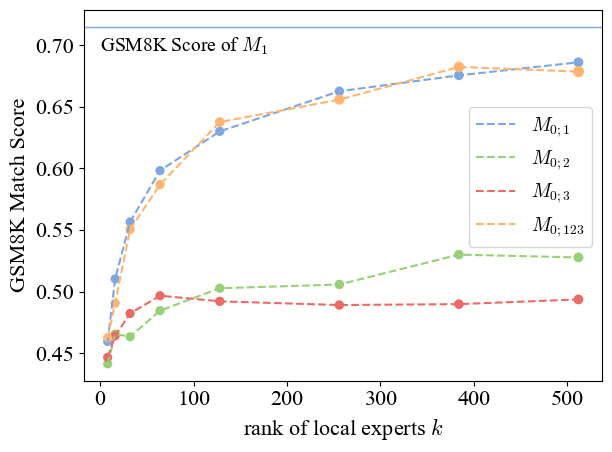

In [20]:
import matplotlib.pyplot as plt

palette = ["#7EA6E0", "#97D077", "#EA6B66", "#FFB570", "#CCCCCC"]
plt.rcParams.update({"font.size": 16})

# Assuming 'results' is a DataFrame with columns 'k', 'score', and 'model'
models = results["model"].unique()

for model_idx, model in enumerate(models):
    subset = results[(results["model"] == model) & (results["task"] == "gsm8k")]
    plt.plot(
        subset["k"], subset["score"], linestyle="--", label=model, c=palette[model_idx]
    )
    plt.scatter(
        subset["k"],
        subset["score"],
        s=subset["num_params"] / 700_000_000 * 3,
        c=palette[model_idx],
    )

# plot vertical lines of k
# for k in results["k"].unique():
# plt.axvline(x=k, color="gray", linestyle="-.", linewidth=0.5)

plt.xlabel("rank of local experts $k$")
plt.ylabel("GSM8K Match Score")
plt.legend(loc="center right", fontsize=14, bbox_to_anchor=(1, 0.55))

# plot another two lines
# 1. 71.49% is the score of the best model
# 2. 38.81% is the score of the base model
plt.axhline(y=0.7149, color=palette[0], linewidth=1, linestyle="-")
plt.text(0, 0.7149 - 0.02, "GSM8K Score of $M_1$", fontsize=14, color="black")
# plt.axhline(y=0.3881, color="black", linestyle="-", linewidth=1)

plt.tight_layout()
plt.savefig("mistral_gsm8k.pdf", bbox_inches="tight")
plt.show()